In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
import numpy as np
import scarlet
import logging

import tensorflow_hub as hub
import tensorflow as tf
logger = logging.getLogger('scarlet')
logger.setLevel(logging.DEBUG)

In [3]:
import proxmin
import proxmin.operators

In [4]:
module_path='modules/pixelcnn_out'
pixelcnn = hub.Module(module_path)
sess= tf.Session()
sess.run(tf.global_variables_initializer())
x = tf.placeholder(shape=(1,32,32,1), dtype=tf.float32)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
out = pixelcnn(x, as_dict=True)['grads']

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
# Building a blend object

In [8]:
import galsim

In [9]:
data_dir='/usr/local/share/galsim/COSMOS_25.2_training_sample'
cat = galsim.COSMOSCatalog(dir=data_dir)

In [10]:
# Let's build a scene
im = galsim.Image(64, 64, scale=0.06)

gals=[1,5]

gal1 = cat.makeGalaxy(1)
gal2 = cat.makeGalaxy(2).shift(dx=0.06*5,dy=0)
scene = galsim.Add([gal1, gal2])

scene = galsim.Convolve(scene, gal1.original_psf)

scene.drawImage(im);

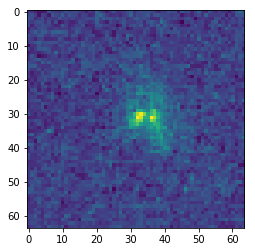

In [11]:
imshow(im.array)

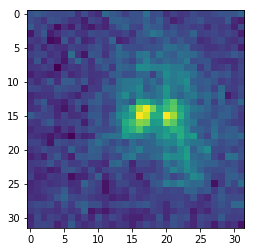

In [12]:
imshow(im.array[16:-16,16:-16]);

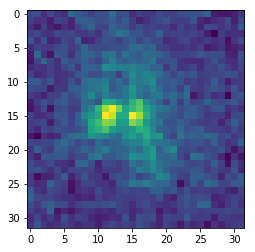

In [13]:
imshow(im.array[16:-16,16+5:-16+5]);

In [14]:
X1 = np.zeros((32,32))
X2 = np.zeros((32,32))
X = np.zeros((64,64))
Y = im.array

In [ ]:
for i in range(5000):
    # Update  X
    X = np.zeros((64,64))
    X[16:-16,16+5:-16+5] += X2
    X[16:-16,16:-16] += X1
    
    res = Y - X 

    U2 = res[16:-16,16+5:-16+5] - 1e-3*sess.run(out, feed_dict={x: X2.reshape((1,32,32,1))})[0,:,:,0]
    U1 = res[16:-16,16:-16] - 1e-3*sess.run(out, feed_dict={x: X1.reshape((1,32,32,1))})[0,:,:,0]
    
    X1 = X1 + 0.001*U1
    X2 = X2 + 0.001*U2

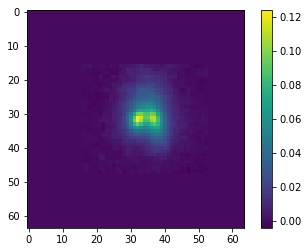

In [27]:
imshow(X); colorbar()

Text(0.5, 1.0, 'Residual')

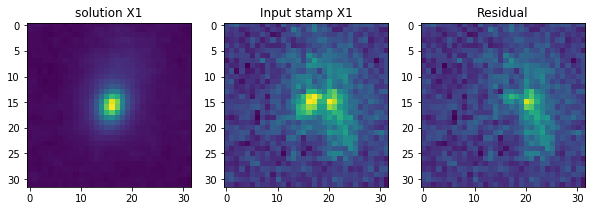

In [28]:
figure(figsize=(10,5))
subplot(131)
imshow(X1)
title('solution X1')
subplot(132)
imshow(im.array[16:-16,16:-16],vmax=0.15,vmin=-0.03);
title('Input stamp X1')
subplot(133)
imshow(im.array[16:-16,16:-16] - X1,vmax=0.15,vmin=-0.03);
title('Residual')

Text(0.5, 1.0, 'Residual')

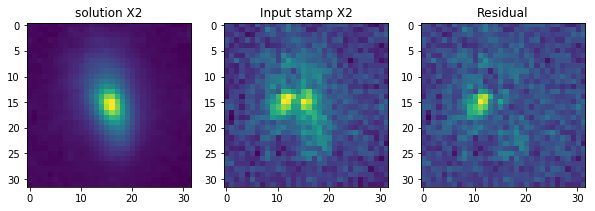

In [29]:
figure(figsize=(10,5))
subplot(131)
imshow(X2,)
title('solution X2')
subplot(132)
imshow(im.array[16:-16,16+5:-16+5],vmax=0.15,vmin=-0.03);
title('Input stamp X2')
subplot(133)
imshow(im.array[16:-16,16+5:-16+5] - X2);
title('Residual')

Text(0.5, 1.0, 'residuals')

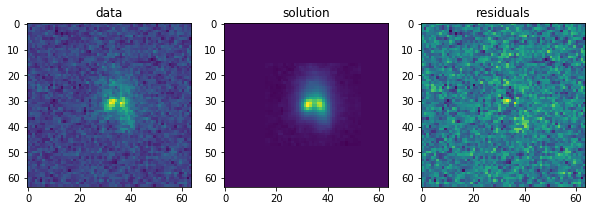

In [30]:
figure(figsize=(10,5))
subplot(131)
imshow(Y)
title('data')
subplot(132)
imshow(X)
title('solution')
subplot(133)
imshow(Y-X)
title('residuals')